**What is a time series?**

According to the wikipedia, A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. For example, stock prices over a fixed period of time, hotel bookings, ecommerce sales, waether cycle reports etc.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.


Let's discuss a few definitions related to time series first.

**Definitions**

* **Level:** Level is the average of the values of the series.
* **Trend:** Trend shows a pattern in the data. For example, whether the stock prices are increasing with time(uptrend) or are they decreasing with time(downtrend) or time doesn't have that much effect on the prices(Horizontal trend)
<img src='trends.PNG'>

Image Courtsey: Financial Hub
* **Seasonality:** When the data shows a repetative pattern for over an year, it can be termed as seasonal pattern. For example, the sale of airconditioners will increase every year during summer and the sale will decrease during winter.
* **Cyclic Patterns:** These are the repetative patterns shown over a longer period of time(more than one year). For example, after every five year the share market has some fluctuations due to the general elections. 
* **Noise:** The variations which do not  show any pattern.


Let's now take an example to see what was done before the advent of Time Series Analysis.

Let's say that we have a problem at hand where we have been asked to predict the sales of skiing products for a sports manufacturer. You can do the predictions using the following methods:

**Old Methods**
* **Using Average:** You might give the prediction as the average of all the prevous values.
* **Using Moving Average:** This is the average of the previous values over a fixed period. For example  you might predict the sales in November based on the average of past 3 months. The past three months will be August, September and October. If you are predicting the sales for December, the past three months will be September, October and November. Although the number of months considered are same but the window moved from one set of months to another. Hence the name Moving Average.
* **Using the Naive Method:** The Naive method says that the prediction will be same as the last figure. For example, the prediction for November will be the sales for October.
* **Using the Seasonal Naive Method:**  Seasonal naive method is similar to naive method. Here, the new prediction is equal to the sales for the previous season.

## ARIMA

In [7]:
#import the libraries

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [8]:
# to read the data

birth_data=pd.read_csv('Daily_female_birth_CA.csv') 

In [9]:
birth_data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [10]:
birth_data=pd.read_csv('Daily_female_birth_CA.csv', index_col=[0], parse_dates=[0])

In [11]:
birth_data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [12]:
birth_data.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [13]:
birth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [14]:
birth_data.shape

(365, 1)

<Axes: xlabel='date'>

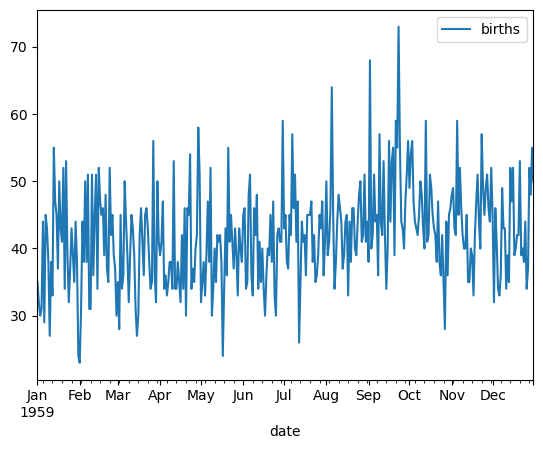

In [15]:
birth_data.plot()

In [16]:
birth_data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
# also called as smoothing
moving_average_birth=birth_data.rolling(window=25).mean()  
# window: This is the number of observations used for calculating the statistic. 

In [19]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,41.28
1959-12-28,41.52
1959-12-29,41.80


<Axes: xlabel='date'>

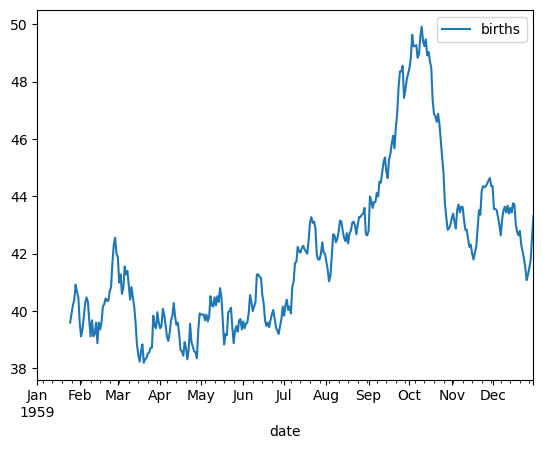

In [20]:
# new changes in plot 
moving_average_birth.plot() 

In [21]:
#test for correlation

sm.stats.durbin_watson(birth_data) 

array([0.04624491])

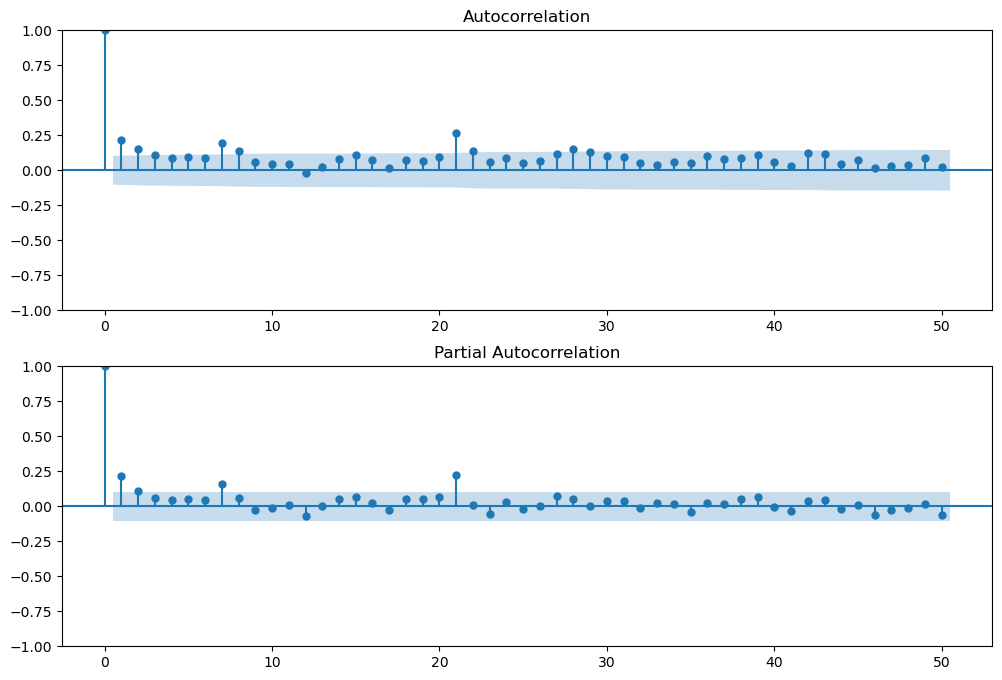

In [22]:
# creat subplot by visualizing acf and pacf

%matplotlib inline
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211) #row, column and my position which is 1
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags= 50, ax=ax1)

ax2 = fig.add_subplot(212) #row, column and my position which is 2
fig = sm.graphics.tsa.plot_pacf(birth_data, lags=50, ax=ax2)

In [23]:
train_data=birth_data[0:320]

test_data=birth_data[320:]

In [24]:
from sklearn.model_selection import train_test_split
t_x,t=train_test_split(birth_data)

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
arima_model = ARIMA(train_data, order=(2, 1, 3))

C:\Users\Tanvi Shinde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Tanvi Shinde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Tanvi Shinde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [27]:
model= arima_model.fit()

In [28]:
model.aic

2167.8472399216453

In [31]:
pred= model.forecast(steps=45)

In [32]:
pred[0]

42.86063954148692

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_data, pred)

42.727728607538744

In [39]:
np.sqrt(mean_squared_error(test_data,pred))

6.536645057484669